## Simple Linear Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


# Importing the dataset
dataset = pd.read_csv('Salary_Data.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values


# Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

C:\Users\harsh\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Fitting Simple Linear Regression to the Training set

In [2]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [3]:
X_train

array([[ 2.9],
       [ 5.1],
       [ 3.2],
       [ 4.5],
       [ 8.2],
       [ 6.8],
       [ 1.3],
       [10.5],
       [ 3. ],
       [ 2.2],
       [ 5.9],
       [ 6. ],
       [ 3.7],
       [ 3.2],
       [ 9. ],
       [ 2. ],
       [ 1.1],
       [ 7.1],
       [ 4.9],
       [ 4. ]])

In [11]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)


### Visualising the Training set results

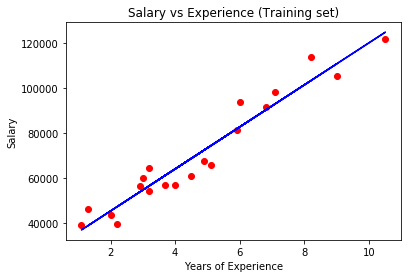

In [12]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

### Visualising the Test set results

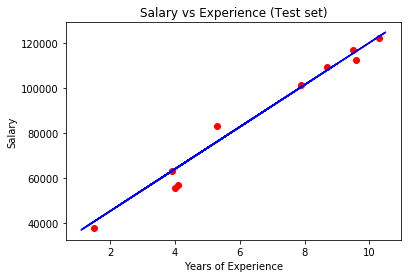

In [13]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [2]:
numbers= list(range(5))
years=[]
for number in numbers:
	years.append(number*5)

result=[n for n in years if n%2==0]
print(result)


import pandas as pd
import numpy as np
users= pd.DataFrame([{'Name':'John','Question_1':56,'Question_2':87,'Question_3':67,'Question_4':87,'Age':20},
{'Name':'Carl','Question_1':45,'Question_2':67,'Question_3':54,'Question_4':45,'Age':28},
{'Name':'Joe','Question_1':76,'Question_2':98,'Question_3':12,'Question_4':56,'Age':37}])

users.set_index(['Name'],inplace=True)

questions=['Question_1','Question_2','Question_3,'Question_4']

result=users.apply(lambda data:np.max(data[questions]),axis=1)
result

def foo(*args):
	print('foo(',*args,')')
	def inside_foo(x):
		print('inside_foo')
		def inside_inside_foo(*args):
			print('inside_inside_foo(',*args,')')
			return x(*args)
		return inside_inside_foo
	return inside_foo

@foo(1,2,3)
def bar(*args):
	return sum(args)

print('outside')
print(bar(4,5,6))


model= SARIMAX(series, trend='n',order=(0,1,0),)

SyntaxError: invalid syntax (<ipython-input-2-d10f8cf3a596>, line 18)

In [5]:
import numpy as np
import pandas as pd
from scipy.stats import norm
import statsmodels.api as sm
import matplotlib.pyplot as plt
from datetime import datetime
import requests
from io import BytesIO

In [7]:
# Dataset
wpi1 = requests.get('https://www.stata-press.com/data/r12/wpi1.dta').content
data = pd.read_stata(BytesIO(wpi1))
data.index = data.t

# Fit the model
mod = sm.tsa.statespace.SARIMAX(data['wpi'], trend='c', order=(1,1,1))
res = mod.fit(disp=False)
print(res.summary())

                           Statespace Model Results                           
Dep. Variable:                    wpi   No. Observations:                  124
Model:               SARIMAX(1, 1, 1)   Log Likelihood                -134.983
Date:                Sat, 13 Oct 2018   AIC                            277.965
Time:                        18:15:23   BIC                            289.246
Sample:                    01-01-1960   HQIC                           282.548
                         - 10-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1050      0.068      1.546      0.122      -0.028       0.238
ar.L1          0.8740      0.054     16.178      0.000       0.768       0.980
ma.L1         -0.4206      0.100     -4.191      0.0

In [9]:
# Dataset
data = pd.read_stata(BytesIO(wpi1))
data.index = data.t
data['ln_wpi'] = np.log(data['wpi'])
data['D.ln_wpi'] = data['ln_wpi'].diff()

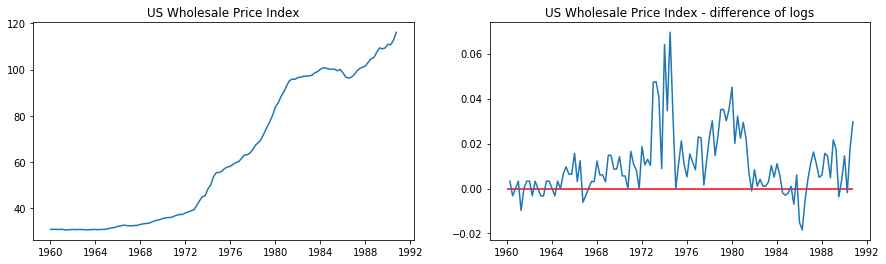

In [10]:
# Graph data
fig, axes = plt.subplots(1, 2, figsize=(15,4))

# Levels
axes[0].plot(data.index._mpl_repr(), data['wpi'], '-')
axes[0].set(title='US Wholesale Price Index')

# Log difference
axes[1].plot(data.index._mpl_repr(), data['D.ln_wpi'], '-')
axes[1].hlines(0, data.index[0], data.index[-1], 'r')
axes[1].set(title='US Wholesale Price Index - difference of logs');

In [12]:
# Fit the model
mod = sm.tsa.statespace.SARIMAX(data['ln_wpi'], trend='n', order=(1,1,0))
res = mod.fit(disp=False)
print(res.summary())

                           Statespace Model Results                           
Dep. Variable:                 ln_wpi   No. Observations:                  124
Model:               SARIMAX(1, 1, 0)   Log Likelihood                 371.274
Date:                Sat, 13 Oct 2018   AIC                           -738.549
Time:                        18:16:20   BIC                           -732.908
Sample:                    01-01-1960   HQIC                          -736.257
                         - 10-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7627      0.047     16.284      0.000       0.671       0.854
sigma2         0.0001   9.82e-06     14.146      0.000       0.000       0.000
Ljung-Box (Q):                       80.32   Jarque-

In [14]:
nums=[1,2,3,4,5]

In [16]:
nums.pop()

4

In [19]:
nums.pop(nums(2))

TypeError: 'list' object is not callable